# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import tensorflow as tf
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_valid_orig, y_valid_orig = valid['features'], valid['labels']
X_test_orig, y_test_orig = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
print('Xtrain_orig shape: {}'.format(X_train_orig.shape))
print('Xtrain_orig numExamples: {}'.format(X_train_orig.shape[0]))
print('Image shape: {}',X_train_orig[0].shape)
np.shape(X_train_orig)
print('y_train_orig count = ', len(np.unique(y_train_orig)))
np.unique(y_train_orig)


Xtrain_orig shape: (34799, 32, 32, 3)
Xtrain_orig numExamples: 34799
Image shape: {} (32, 32, 3)
y_train_orig count =  43


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train_orig[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_orig))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

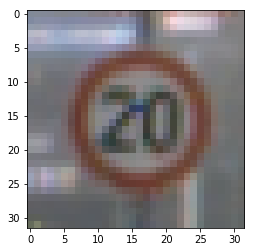

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import csv
signnames={}
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        signnames[int(row['ClassId'])] =  row['SignName']

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(1)
plt.imshow(X_train_orig[10000])
        

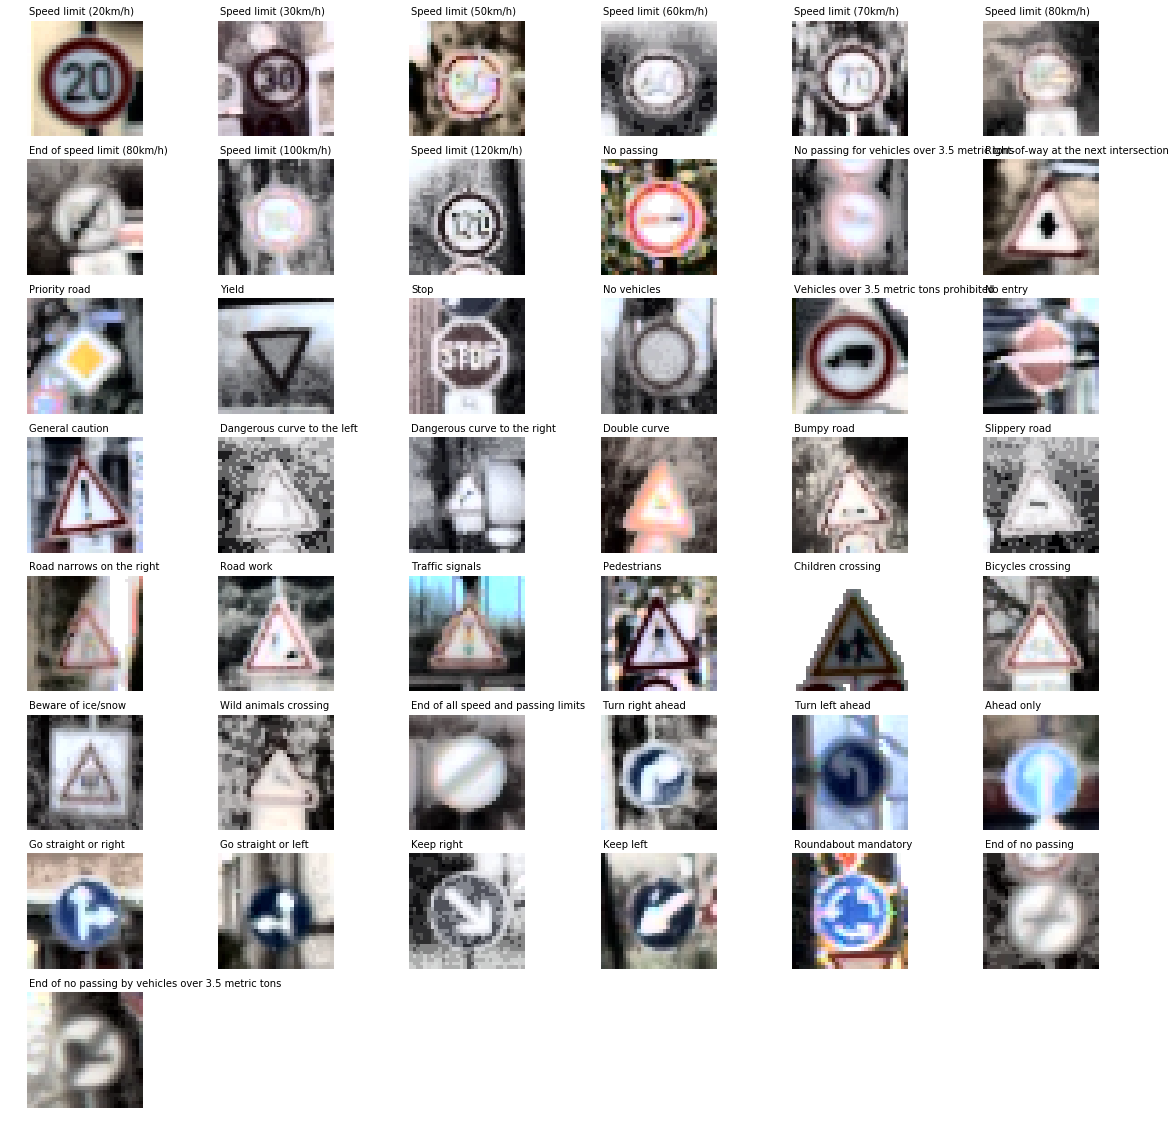

In [25]:

#fig, axes = plt.subplots(8, 6,figsize=(20,20), squeeze=False)

#for i, axis in enumerate(axes.reshape((48,))):
#    axis.axis('off')
#    if i < 43 :
#        y_idx_arr, = np.where(y_train_orig == i)
#        axis.imshow(X_train_orig[y_idx_arr[0]])
#        axis.text(0,-2, signnames[i])
    
import cv2 
fig, axes = plt.subplots(8, 6,figsize=(20,20), squeeze=False)

for i, axis in enumerate(axes.reshape((48,))):
    axis.axis('off')
    if i < 43 :
        y_idx_arr, = np.where(y_train_orig == i)
        img = X_train_orig[y_idx_arr[0]]
       # img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
       # img_output = cv2.equalizeHist(img_gray)
        img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
        axis.imshow(img_output)
        axis.text(0,-2, signnames[i])
    

num of Validation classes : 43
num of Validation classes : 43


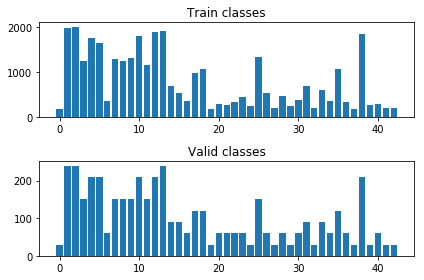

In [6]:
# plot class count distribution in train and valid
f, cd_axes= plt.subplots(2,1)

# Train dataset classes
classes, counts = np.unique(y_train_orig, return_counts=True)
print('num of Validation classes :',len(classes) )

# CHECK VALIDATAION DATA SET
v_classes, v_counts = np.unique(y_valid_orig, return_counts=True)
print('num of Validation classes :',len(v_classes) )

cd_axes[0].bar(classes, counts)
cd_axes[0].set_title('Train classes')


cd_axes[1].bar(v_classes, v_counts)
cd_axes[1].set_title('Valid classes')

plt.tight_layout()
plt.show()



Valid classes have approx similar count distribution(looks like they were sampled with stratifications). we have enough valid samples for each label. Some classes are less represented.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [27]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalize_function 
# rgb values range from 0 to 255
# normalize rgb channels as r-128/128, g-128/128, b-128/128
def normalize(X) :
    return ((X - 128.0)/256)

def yuv_hist_equalize(img) :
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def preprocess(X):
    temp_list = []
    for i in range(0,X.shape[0]):
        img = X[i]
        hist_eql_img = yuv_hist_equalize(img)
        temp_list.append(hist_eql_img)
    print('temp_list_size:',len(temp_list))
    X_hist_equalize = np.array(temp_list)
    print(X_hist_equalize.shape)
    #assert X.shape == X_hist_equalize.shape
    return normalize(X_hist_equalize)

## Preproces
X_train = preprocess(X_train_orig)
y_train = y_train_orig
X_valid = preprocess(X_valid_orig)
y_valid = y_valid_orig
X_test = preprocess(X_test_orig)
y_test = y_test_orig
print('Pre Processed(hist_equalized and normalized) train, valid and test data')

temp_list_size: 34799
(34799, 32, 32, 3)
temp_list_size: 4410
(4410, 32, 32, 3)
temp_list_size: 12630
(12630, 32, 32, 3)
Pre Processed(hist_equalized and normalized) train, valid and test data


In [28]:
X_train_orig[0,0,0:3]

array([[28, 25, 24],
       [27, 24, 23],
       [27, 24, 22]], dtype=uint8)

In [29]:
X_train[0,0,0:3]

array([[-0.23828125, -0.25      , -0.25390625],
       [-0.35546875, -0.3671875 , -0.37109375],
       [-0.35546875, -0.3671875 , -0.37109375]])

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

<h1> Implement LeNet-5 Architecture</h1>
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
<h2> Input</h2>
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. The GTSB dataset images are of size 32x32x3

<h2>Architecture</h2>
<h3>Layer 1:</h3> 
**Convolutional:** Using convolution filters convert 32x32x3 image input to 32 feature maps of size 28x28 (input to layer 32x32x3, output shape 28x28x32)<br/>
Since output width/height is greater than 1/2, the stride used in the filter should be 1. Filter width and heigh can be calculated as follows:<br/>
    <code>
        out_h = (input_h - filter_h + 1)/stride
        filter_h = input_h - out_h*stride +1
        filter_h = 32 -28 *1 +1 = 5
    </code>
Conv filter shape : 5x5x32
Conv output shape : 28x28x32
<br/>**Activation.** RELU
<br/>**Pooling.** The pooling output shape should be 14x14x32. Use 2x2 max pooling
<br/>** Output Shape from Layer1 **: 14x14x32 

<h3>Layer 2:</h3>
**Convolutional:** Output of Layer 1 is the input to Layer 2. So input size is 14x14x32. The output shape should be 10x10x64.</br>
    filter shape : 5x5x64
    con output shape : 10x10x64
<br/>**Activation.** RELU
<br/>**Pooling.** Use 2x2 max pooling. The output shape should be 5x5x64.
<br/>**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.
Flatten 5x5x64 into a 1D arryay of size 1600
    
<h3>Layer 3</h3>: 
** Fully Connected.** Multi-scaled input by combining convolutions of layer1 and layer2. Input array size 1600 + 6272 = 7872. This should have 512 outputs.
<br/>**Activation.** RELU
<br/>** Regularization** dropout (keep_prob =0.5)

<h3>**Layer 4</h3>: 
**Fully Connected.** 512 inputs. This should have 256 outputs.
<br/>**Activation.** RELU
<br/>** Regularization** dropout (keep_prob =0.5)

<h3>Layer 5:</h3> 
**Fully Connected (Logits).** Input = 256. This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [30]:
import tensorflow as tf

keep_prob = tf.placeholder(tf.float32)

def leNet(X) :
    mu = 0
    sigma = 0.1
    
    #### LAYER 1 ####
    L1_conv_w = tf.Variable(tf.truncated_normal(shape=[5,5,3,32], mean = mu, stddev = sigma))
    L1_conv_b = tf.Variable(tf.zeros(32))
    L1_conv = tf.nn.conv2d(X, L1_conv_w, strides=[1,1,1,1], padding='VALID') + L1_conv_b
    #L1 activation with RELU
    L1_conv = tf.nn.relu(L1_conv,name='L1_conv_relu')
    # L1_conv shape is 28x28x32. max pool and downsize to 14x14x32
    L1_conv = tf.nn.max_pool(L1_conv, ksize=[1,2,2,1],strides=[1,2,2,1], padding='VALID')

    #### LAYER 2 ####
    L2_conv_w = tf.Variable(tf.truncated_normal(shape=[5,5,32,64], mean = mu, stddev = sigma))
    L2_conv_b = tf.Variable(tf.zeros(64))
    L2_conv = tf.nn.conv2d(L1_conv, L2_conv_w, strides=[1,1,1,1], padding='VALID') + L2_conv_b
    L2_conv = tf.nn.relu(L2_conv, name='L2_conv_relu')
    # l2 conv shape is 10x10x64 .. downsize to 5x5x64
    L2_conv = tf.nn.max_pool(L2_conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    
    # Multi scale. Combine O/P of layer 1 and O/P layer 2 so layer 3 
    # can work with different scales of the convolutions
    # Flatten. Input = 5x5x64. Output = 1600 
    L2_conv_flat = tf.contrib.layers.flatten(L2_conv)
    # Flatten. Input = 14x14x32. Output = 6272 
    L1_conv_flat = tf.contrib.layers.flatten(L1_conv)
    # fc_input - size 7872
    fc_input= tf.concat(1,[L1_conv_flat, L2_conv_flat])
    
    
    #### LAYER 3 ####
    L3_fc_w = tf.Variable(tf.truncated_normal(shape=[7872,512], mean = mu, stddev=sigma))
    L3_fc_b = tf.Variable(tf.zeros(512))
    L3_fc_out = tf.matmul(fc_input,L3_fc_w) + L3_fc_b
    L3_fc_out = tf.nn.relu(L3_fc_out, name='L3_fc_relu')
    L3_fc_drop = tf.nn.dropout(L3_fc_out,keep_prob, name='L3_fc_drop')
    
    ### LAYER 4 ####
    L4_fc_w = tf.Variable(tf.truncated_normal(shape=[512,256], mean = mu, stddev=sigma))
    L4_fc_b = tf.Variable(tf.zeros(256))
    L4_fc_out = tf.matmul(L3_fc_drop,L4_fc_w) + L4_fc_b
    L4_fc_out = tf.nn.relu(L4_fc_out, name='L4_fc_relu')
    L4_fc_drop = tf.nn.dropout(L4_fc_out,keep_prob, name='L4_fc_drop')
    
    ### LAYER 5 ####
    L5_fc_w = tf.Variable(tf.truncated_normal(shape=[256,43], mean = mu, stddev=sigma))
    L5_fc_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(L4_fc_drop, L5_fc_w) + L5_fc_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [31]:
x = tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)

EPOCHS=100
BATCH_SIZE=128

In [32]:
alpha=0.001
logits = leNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=alpha)
training_operation = optimizer.minimize(loss)


EVALUATION helper 

In [33]:
correct_predictions = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_op = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
saver = tf.train.Saver()

def evaluate(X,Y,dropout_keep_prob=1.0):
    num_examples = len(X)
    total_accuracy =0
    sess = tf.get_default_session()
    for offset in range(0,num_examples, BATCH_SIZE) :
        batch_x, batch_y = X[offset:offset+BATCH_SIZE], Y[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x:batch_x, y:batch_y, keep_prob:dropout_keep_prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy/num_examples

In [34]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [35]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range (EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range (0, num_examples, BATCH_SIZE) :
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset: end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5})
            
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        
        if i % 10 == 0 :
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet_multi_scale_hist_eql')
    print("Model saved")

Training...
EPOCH 1 ...
Training Accuracy = 0.861
Validation Accuracy = 0.805
EPOCH 11 ...
Training Accuracy = 0.998
Validation Accuracy = 0.950
EPOCH 21 ...
Training Accuracy = 1.000
Validation Accuracy = 0.960
EPOCH 31 ...
Training Accuracy = 0.999
Validation Accuracy = 0.960
EPOCH 41 ...
Training Accuracy = 1.000
Validation Accuracy = 0.967
EPOCH 51 ...
Training Accuracy = 1.000
Validation Accuracy = 0.968
EPOCH 61 ...
Training Accuracy = 1.000
Validation Accuracy = 0.971
EPOCH 71 ...
Training Accuracy = 1.000
Validation Accuracy = 0.973
EPOCH 81 ...
Training Accuracy = 1.000
Validation Accuracy = 0.976
EPOCH 91 ...
Training Accuracy = 1.000
Validation Accuracy = 0.977
Model saved


In [37]:
# TESTING 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    print("Restoring from {}".format('./lenet_multi_scale_hist_eql'))
    saver.restore(sess, './lenet_multi_scale_hist_eql')
    training_accuracy = evaluate(X_train, y_train)    
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Acc. = {:.4f}".format(test_accuracy))

Restoring from ./lenet_multi_scale_hist_eql
Training Accuracy = 1.000
Validation Accuracy = 0.975
Test Acc. = 0.9584


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

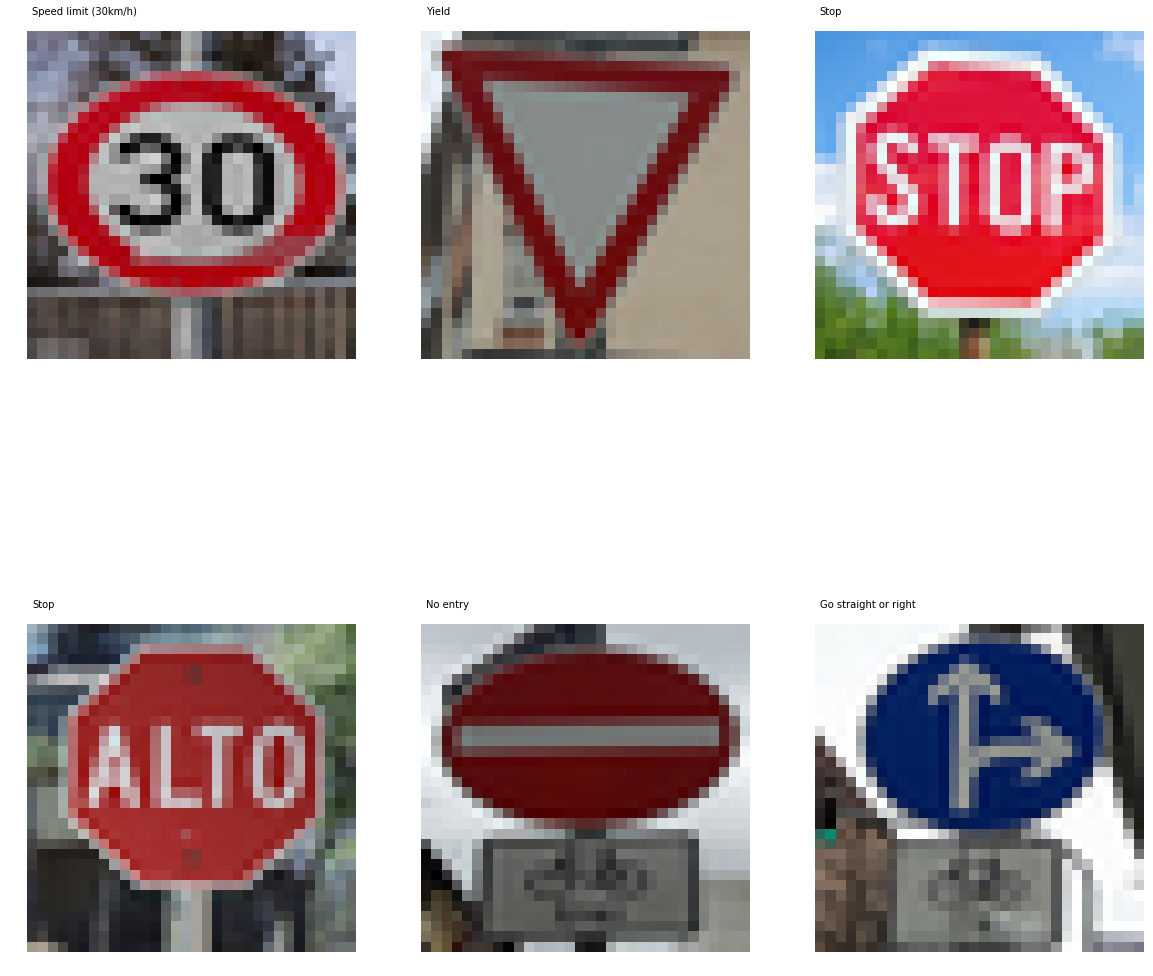

In [38]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

f = open("./web_data/X_internet.pickle", "rb")
x_internet, y_internet = pickle.load(f)

fig, axes = plt.subplots(2, 3,figsize=(20,20), squeeze=False)

for i, axis in enumerate(axes.reshape((6,))):
    axis.axis('off')
    axis.imshow(x_internet[i])
    axis.text(0,-2, signnames[int(y_internet[i])])

### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

temp_list_size: 6
(6, 32, 32, 3)
Restoring from ./lenet_multi_scale_hist_eql
Internet Accuracy = 0.833
0 . y_label= Speed limit (30km/h)
predicted (indx, signname, prob) =(1,Speed limit (30km/h),1.0)
1 . y_label= Yield
predicted (indx, signname, prob) =(13,Yield,1.0)
2 . y_label= Stop
predicted (indx, signname, prob) =(14,Stop,1.0)
3 . y_label= Stop
predicted (indx, signname, prob) =(14,Stop,1.0)
4 . y_label= No entry
predicted (indx, signname, prob) =(12,Priority road,1.0)
5 . y_label= Go straight or right
predicted (indx, signname, prob) =(36,Go straight or right,0.9999769926071167)


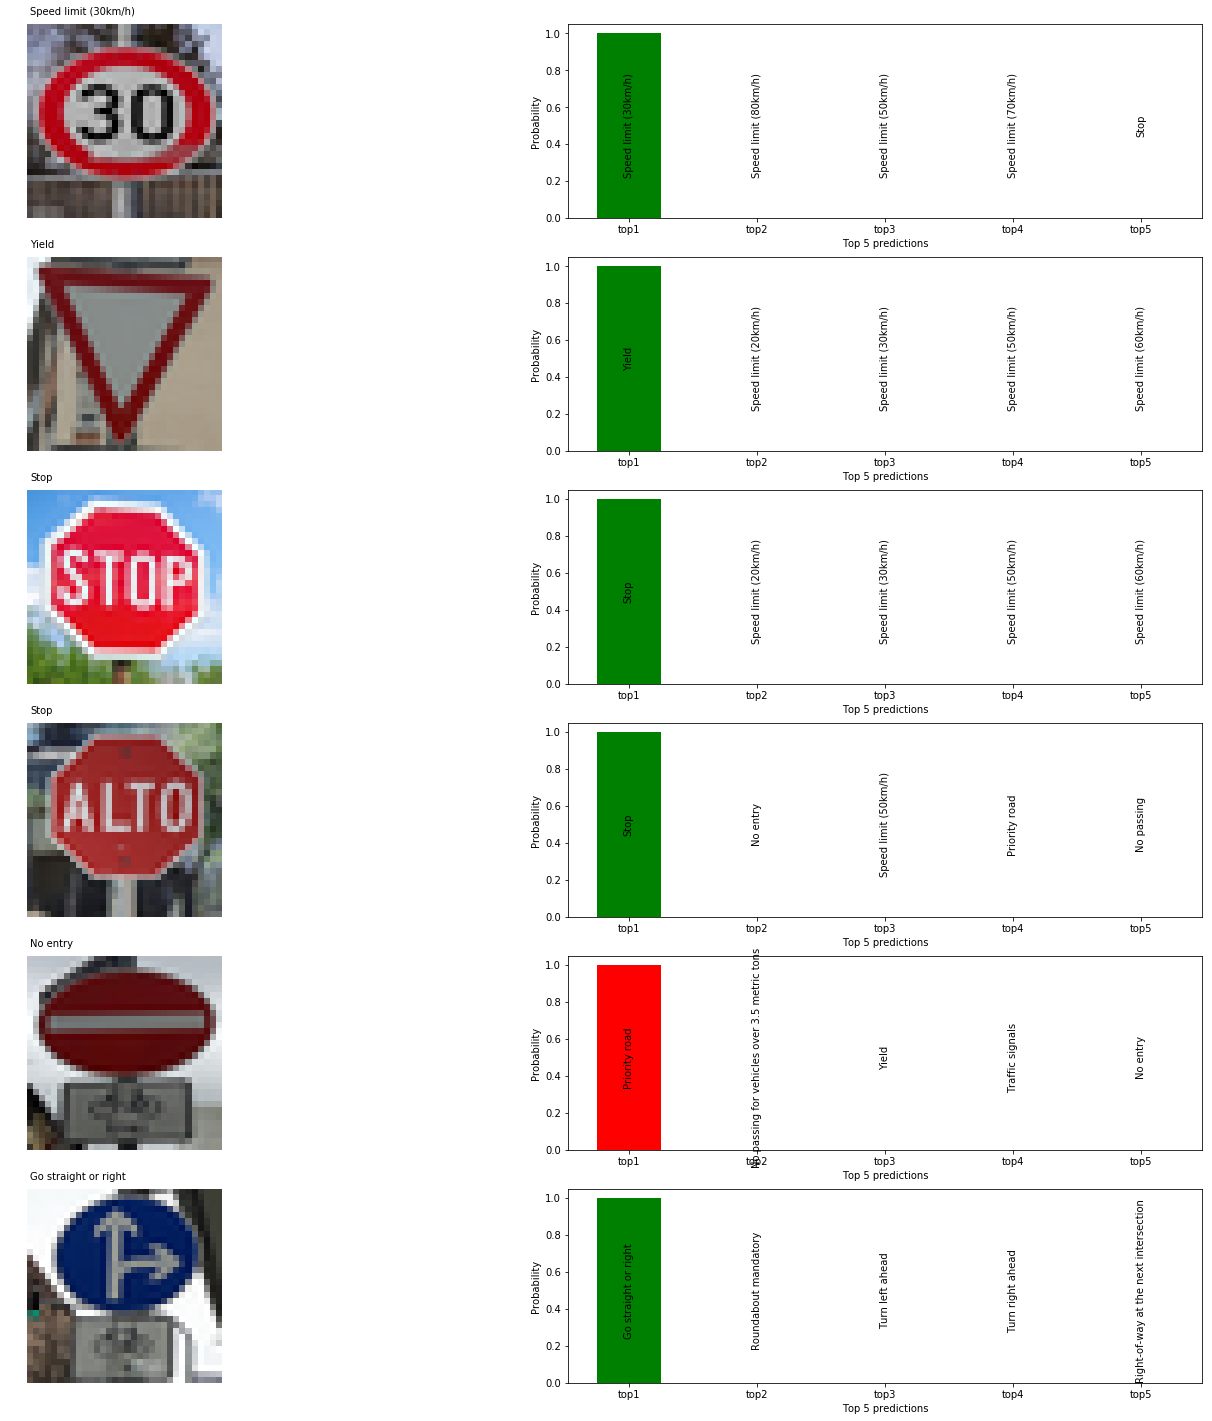

In [39]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def plot_top_k(ax, topk_probs, top_indx, y_label):
    print('predicted (indx, signname, prob) =({},{},{})'.format(top_indx[0], signnames[top_indx[0]], topk_probs[0]))
    
    ind = np.arange(5)
    if y_label == top_indx[0]:
        colr='g'
    else :
        colr='r'
        
    bars = ax.bar(ind, topk_probs, color =colr, width=0.5)
    ax.set_xticks(ind)
    ax.set_xticklabels(('top1','top2','top3','top4','top5'))
    ax.set_ylabel('Probability')
    ax.set_xlabel('Top 5 predictions')

    for i,bar in zip(ind,bars) :
        ax.text(bar.get_x()+bar.get_width()/2, bars[0].get_height()/2, '%s' % signnames[top_indx[i]],
               ha='center', va='center', rotation='vertical')
    

x_internet_preproc = preprocess(x_internet)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    print("Restoring from {}".format('./lenet_multi_scale_hist_eql'))
    saver.restore(sess, './lenet_multi_scale_hist_eql')
    internet_accuracy = evaluate(x_internet_preproc, y_internet)    
    print("Internet Accuracy = {:.3f}".format(internet_accuracy))
    pred_probs_topk, pred_indx_topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), 
                                              feed_dict ={x:x_internet_preproc, y:y_internet, keep_prob:1.0})
    
    # plot the top 5 pred_probs for each image
    f, ax = plt.subplots(len(y_internet), 2,figsize=(25,25), squeeze=False)
    
    for i in range(len(y_internet)) :
        print(i,'. y_label=', signnames[int(y_internet[i])])
        ax[i][0].axis('off')
        ax[i][0].imshow(x_internet[i])
        ax[i][0].text(0,-2, signnames[int(y_internet[i])])
        plot_top_k(ax[i][1], pred_probs_topk[i],pred_indx_topk[i], int(y_internet[i]))

### Analyze Performance

The accuracy for internet images jumped up from  66.7% to  (5 out of 6 images were predicted correctly)

Image 4 was a spanish stop sign with the word 'ALTO'. The classifer classified it correctly as STOP

the non-hist_equalize model had image 6 mapped incorrectly to 'turn right'. But with hist_equalization this model was able to predict image 6 correctly as 'go straight or turn right' 

Images 5 was incorrect. Lets investigate

In [54]:
# Image 5
y_label = y_internet[4]

a, = np.where(y_train_orig == int(y_internet[4]))

print('Total records for train =',len(y_train_orig))
print('Total records for sign {} - "{}" is : {}'.format(y_internet[4], signnames[int(y_internet[4])], len(a)))
print('% of train = ', len(a)/len(y_train_orig)* 100.0)

Total records for train = 34799
Total records for sign 17 - "No entry" is : 990
% of train =  2.8449093364751863


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    
    ###  SOME CHANGES
    ## As suggested by An Nguyen on slack, passing in 'relu:0' in tf_activation and making the tf return the value of processing the relu activation
    ## this didn't work, cause relu probably had a different graph name. name the activations so u can then use it here

    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = sess.run(tf_activation,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    print("Restoring from {}".format('./lenet_multi_scale_hist_eql'))
    saver.restore(sess, './lenet_multi_scale_hist_eql')
    outputFeatureMap(x_internet_preproc,'L2_conv_relu')

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 